In [1]:
from scipy import stats
srcc = stats.spearmanr( [5,8,-1,2], [6,1,9,3])
srcc[0]

-0.7999999999999999

In [47]:
%cd ..


e:\books\uni\arshad\OTHER\ترم 3\پایاننامه\proposal\knowledge distillation\CKDN_code


In [3]:
import predict_one_image



In [4]:
iqa = predict_one_image.IQA_CKDN()

In [5]:
iqa.predict(restored_addr="images1/restored/3.png" , degraded_addr= "images1/degraded/3.png")  # dist , ref

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


0.3415382

In [6]:
dte = iqa.get_DTE_features("images1/restored/3.png")
qse = iqa.get_QSE_features("images1/restored/3.png")
qse_minus = iqa.get_QSE_minus_DTE_features("images1/restored/3.png" , "images1/restored/3.png" )
last_features = iqa.extract_last_features("images1/restored/3.png" , "images1/restored/3.png")

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [8]:
dte.shape , qse.shape , qse_minus.shape , last_features.shape

((1, 256), (1, 256), (1, 256), (1, 512))

In [11]:
import glob

len(glob.glob("CSIQ/dst_imgs/*/*"))

150

In [47]:
f = open("CSIQ/scores.txt", "r")
lines = f.readlines()
lines[654].split(" ")[3]

'dst_imgs/fnoise/snow_leaves.fnoise.5.png'

In [48]:
import glob
dsts = ["awgn" , "blur" , "contrast" , "fnoise" , "jpeg" , "jpeg2000"]





def get_images_dst(dst_type ):
    imgs = []
    f = open("CSIQ/scores.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(" ")[3].split(".")[1] == dst_type:
            imgs.append("CSIQ/"+l.split(" ")[3])
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open("CSIQ/scores.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(" ")[3].split(".")[1] == dst_type:
            mos.append(float(l.split(" ")[-1]))
    return mos



In [49]:
get_images_dst(dsts[4])[67] , get_mos_dst(dsts[4])[67]

('CSIQ/dst_imgs/jpeg/lady_liberty.jpeg.3.png', 0.532)

In [50]:
len(get_images_dst(dsts[2])) , len(get_mos_dst(dsts[2]))

(116, 116)

## on contents

In [44]:
contents

['1600',
 'aerial_city',
 'boston',
 'bridge',
 'butter_flower',
 'cactus',
 'child_swimming',
 'couple',
 'elk',
 'family',
 'fisher',
 'foxy',
 'geckos',
 'lady_liberty',
 'lake',
 'log_seaside',
 'monument',
 'native_american',
 'redwood',
 'roping',
 'rushmore',
 'shroom',
 'snow_leaves',
 'sunsetcolor',
 'sunset_sparrow',
 'swarm',
 'trolley',
 'turtle',
 'veggies',
 'woman']

In [51]:
names = glob.glob("CSIQ/src_imgs/*")
contents = []
for i in names:
    contents.append(i.split("\\")[-1].split(".")[-2])





def get_images_content(im_name ):
    imgs = []
    f = open("CSIQ/scores.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(" ")[3].split("/")[-1].split(".")[0] == im_name:
            imgs.append("CSIQ/"+l.split(" ")[3])

    return imgs


def get_mos_content(im_name ):
    mos = []
    f = open("CSIQ/scores.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(" ")[3].split("/")[-1].split(".")[0] == im_name:
            mos.append(float(l.split(" ")[-1]))

    return mos



In [52]:
len(get_images_content("sunset_sparrow")) , len(get_mos_content("sunset_sparrow"))

(29, 29)

## CSIQ -> last features

In [59]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in dsts:
    
    imgs = get_images_dst(c)


    for i in range(len(imgs)):
        dd = iqa.extract_last_features(imgs[i] , imgs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

   
    
    print(row)
    row +=1


refs = glob.glob("CSIQ/src_imgs/*")

for r in refs:
    dd = iqa.extract_last_features(r , r)[0]
    features1.append(dd)
    contnts.append("456")
    is_ref.append("1")


features1 = np.array(features1)

3
4
5
6
7
8


In [60]:
features1.shape , len(contnts) , len(is_ref)

((896, 512), 896, 896)

<AxesSubplot:xlabel='1', ylabel='2'>

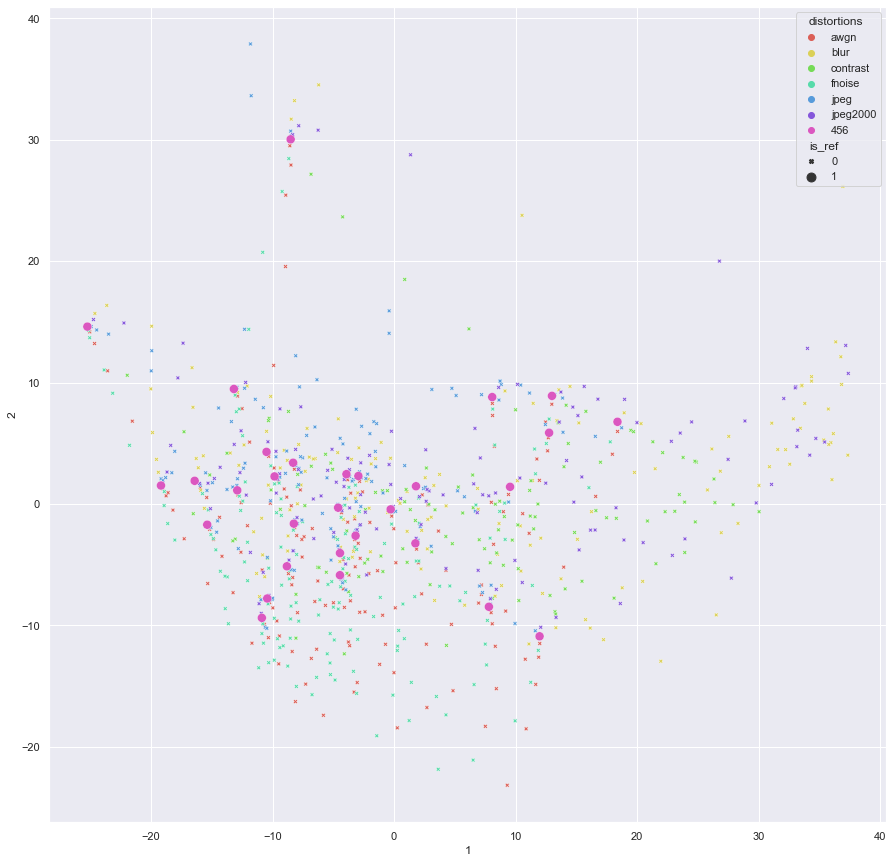

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'distortions':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='distortions',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

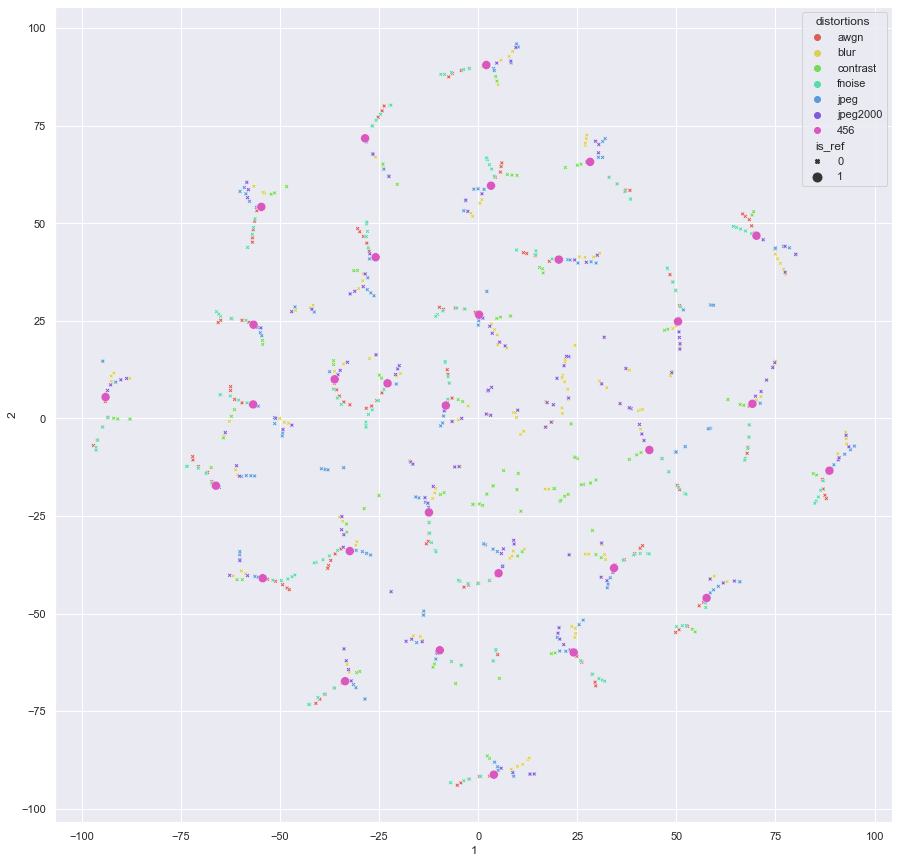

In [62]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'distortions':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='distortions',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

## last features content

In [63]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in contents:
    
    imgs = get_images_content(c)


    for i in range(len(imgs)):
        dd = iqa.extract_last_features(imgs[i] , imgs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

   
    
    print(row)
    row +=1


refs = glob.glob('CSIQ/src_imgs/*')

for r in refs:
    dd = iqa.extract_last_features(r , r)[0]
    features1.append(dd)
    contnts.append("456")
    is_ref.append("1")


features1 = np.array(features1)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


<AxesSubplot:xlabel='1', ylabel='2'>

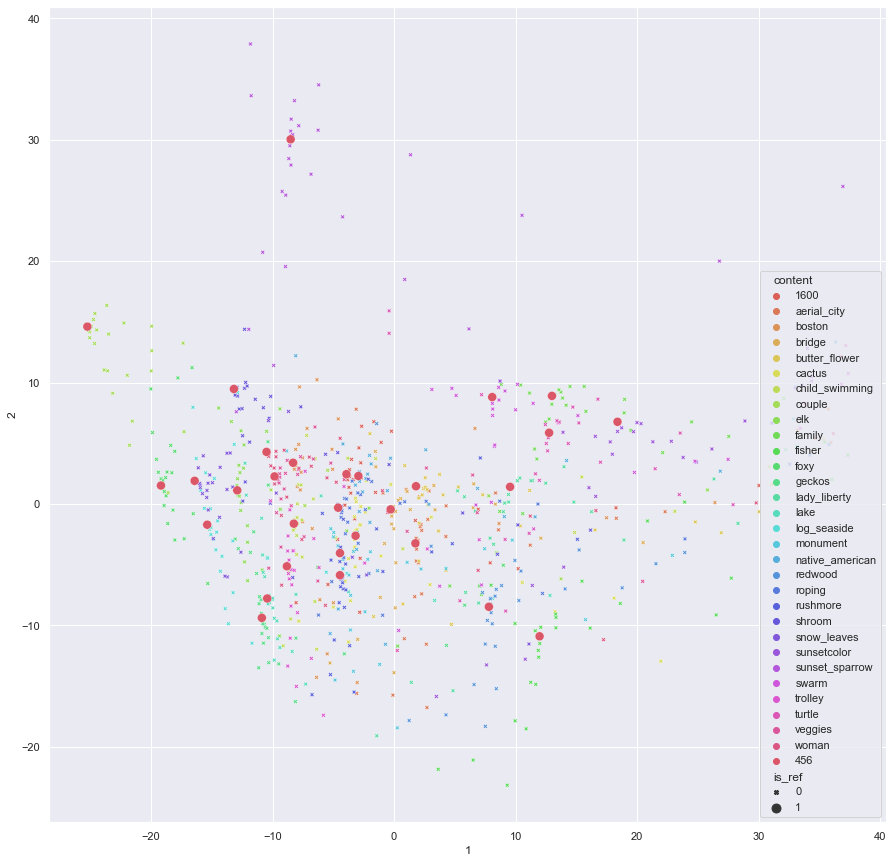

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

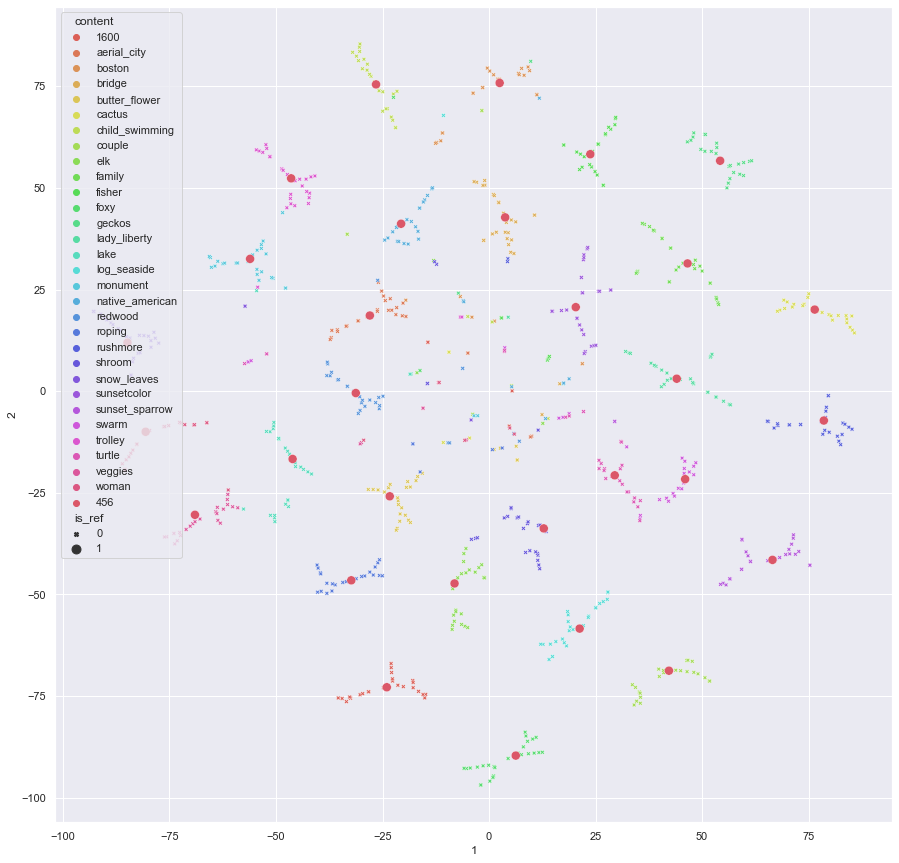

In [65]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

# SROCC on dist type:

In [74]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('SRCC_CSIQ_DST_CKDN_NR.xlsx')
worksheet = workbook.add_worksheet()

In [75]:
import numpy as np 

row = 3


all_mos = []
all_preds = []

for c in dsts:
    
    preds = []
    imgs = get_images_dst(c)
    moses = get_mos_dst(c)

    for i in range(len(imgs)):
        preds.append(iqa.predict(imgs[i] , imgs[i]))

    all_mos += moses
    all_preds+= preds
    
    sp = stats.spearmanr( preds, moses)[0]
    worksheet.write(row, 4, c)
    worksheet.write(row, 5,  sp)
    
    print(row)
    row +=1


worksheet.write(11, 4, "all")
worksheet.write(11, 5,  stats.spearmanr( all_mos, all_preds)[0])

workbook.close()  


3
4
5
6
7
8


# SROCC on content type:

In [76]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('SRCC_CSIQ_CONTENT_CKDN_NR.xlsx')
worksheet = workbook.add_worksheet()

In [77]:
import numpy as np 

row = 3

all_mos = []
all_preds = []


for c in contents:
    
    preds = []
    imgs = get_images_content(c)
    moses = get_mos_content(c)

    for i in range(len(imgs)):
        preds.append(iqa.predict(imgs[i] , imgs[i]))

    all_mos += moses
    all_preds += preds

    sp = stats.spearmanr( preds, moses)[0]
    worksheet.write(row, 4, c)
    worksheet.write(row, 5,  sp)
    
    print(row)
    row +=1


worksheet.write(35, 4, "all")
worksheet.write(35, 5,  stats.spearmanr( all_mos, all_preds)[0])



workbook.close()  

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


## train mlp model

In [1]:
%cd ..


e:\books\uni\arshad\OTHER\ترم 3\پایاننامه\proposal\knowledge distillation\CKDN_code


In [2]:
import glob
import cv2 

tid = "E:/books/uni/arshad/OTHER/term2/seminars/papers/Mengyang2019/bosse2017 varianced_patches/test_varianced_and_random_patch_method/datasets/TID2013"
glob.glob(tid+"/*")


f = open(tid+"/mos_with_names.txt", "r")
lines = f.readlines()

lines[547].split(" ")[0]
# im

'5.60976'

In [3]:

import predict_one_image
import numpy as np

iqa = predict_one_image.IQA_CKDN()

az = "DIV2K_valid_HR/0814.png"
xx = "DIV2K_valid_HR/0814.png"

a1 = iqa.extract_last_features(az , az)[0]
a2 = iqa.extract_last_features(xx , xx)[0]

res = np.hstack((a1, a1-a2))

res.shape

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


(1024,)

In [4]:
import copy
import glob
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.optim as optim
from tqdm import tqdm
import predict_one_image

 
from torch.utils.data import DataLoader

 





class extend_model(torch.nn.Module):

    def __init__(self):
        super(extend_model, self).__init__()

        self.linear1 = nn.Linear(1024, 4096)
        self.act1 = nn.ReLU()
        self.linear2 = nn.Linear(4096, 2048)
        self.act2 =  nn.ReLU()
        self.linear3 = nn.Linear(2048, 512)
        self.act3 =  nn.ReLU()
        self.linear4 = nn.Linear(512, 1)


    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.linear3(x)
        x = self.act3(x)
        x = self.linear4(x)
        return x
    

    def extract_feature(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.linear3(x)
        return x











In [5]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



class feature_dataset(Dataset):
    def __init__(self):
        self.tidAddr = "E:/books/uni/arshad/OTHER/term2/seminars/papers/Mengyang2019/bosse2017 varianced_patches/test_varianced_and_random_patch_method/datasets/TID2013"
        f = open(self.tidAddr+"/mos_with_names.txt", "r")
        self.imgs = f.readlines()
        self.iqa = predict_one_image.IQA_CKDN()


    def __len__(self):
        return len(self.imgs)


    def __getitem__(self, idx):
        HQ_imgs = glob.glob("DIV2K_valid_HR/*")
        HQ_img = random.choice(HQ_imgs)
        dist_img = self.tidAddr + "/distorted_images/"+self.imgs[idx].split(" ")[1][:-1]
        mos = float(self.imgs[idx].split(" ")[0])
        dist_features = self.iqa.extract_last_features(dist_img , dist_img)[0]
        HQ_features = self.iqa.extract_last_features(HQ_img , HQ_img)[0]
        res = np.hstack((dist_features, HQ_features - dist_features))
        return torch.Tensor(res).to(device) , torch.Tensor([mos]).to(device)
     




training_data = feature_dataset()
train_dl = DataLoader(training_data, batch_size=8, shuffle=True )
# test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


 

In [6]:
torch.Tensor([1,2,3]).to(device)

tensor([1., 2., 3.], device='cuda:0')

In [7]:



model = extend_model().to(device)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)
 
n_epochs = 100   # number of epochs to run
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
for epoch in range(n_epochs):
    model.train()
    print("EPOCH:" , epoch+1)

    ep_preds = []
    ep_targets = []
    
    for batch_idx, (data, targets) in enumerate(tqdm(train_dl)):
            # take a batch
        data = data.to(device=device)
        targets = targets.to(device=device)
            # forward pass
        y_pred = model(data)
        loss = loss_fn(y_pred, targets)

        ep_targets+=targets
        ep_preds+=y_pred

        history.append(float(loss))
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()
            # print progress
    # evaluate accuracy at end of each epoch
    ep_preds = torch.Tensor(ep_preds).to(device)
    ep_targets = torch.Tensor(ep_targets).to(device)
    ep_loss =  loss_fn(ep_preds, ep_targets)   
    print("ep_loss: " ,float(ep_loss) )
    if float(ep_loss) < best_mse:
        best_mse = float(ep_loss)
        torch.save(model.state_dict(), 'S12/checkpoints/best_model_epoch_'+str(epoch)+"_loss_"+str(best_mse)+'.pth')
 

plt.plot(history)
plt.show()

EPOCH: 1


  0%|          | 0/375 [00:00<?, ?it/s]c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
100%|██████████| 375/375 [22:55<00:00,  3.67s/it]


ep_loss:  1.8218597173690796


FileNotFoundError: [Errno 2] No such file or directory: 'checkpoints/best_model_epoch_0.pth'

In [11]:
torch.save(model.state_dict(), 'S12/checkpoints/best_model_epoch_'+str(epoch)+"_loss_"+str(1.82)+'.pth')